In [91]:
import pandas as pd

data = pd.read_csv("Dataset/spam.csv", encoding='ISO-8859-1')
# print(data.info())
preview = data.head()
import prettytable
table = prettytable.PrettyTable(field_names=list(data.columns))
# for i in range(len(data)):
    # table.add_row(row)
with pd.option_context('display.max_rows', 5,
                       'display.max_columns', 5,
                       'display.width', 1000,
                       'display.precision', 3,
                       'display.colheader_justify', 'right'):
    print(preview)

     v1                                                 v2 Unnamed: 2 Unnamed: 3 Unnamed: 4
0   ham  Go until jurong point, crazy.. Available only ...        NaN        NaN        NaN
1   ham                      Ok lar... Joking wif u oni...        NaN        NaN        NaN
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN        NaN        NaN
3   ham  U dun say so early hor... U c already then say...        NaN        NaN        NaN
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN        NaN        NaN


In [92]:
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [93]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [94]:
data.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [95]:
!pip install langdetect
import langdetect
from langdetect import LangDetectException

In [96]:
def get_lang(text):
    try:
        return langdetect.detect(text)
    except:
        return "unknown"
data["lang"] = data["v2"].apply(get_lang)

<Axes: xlabel='lang'>

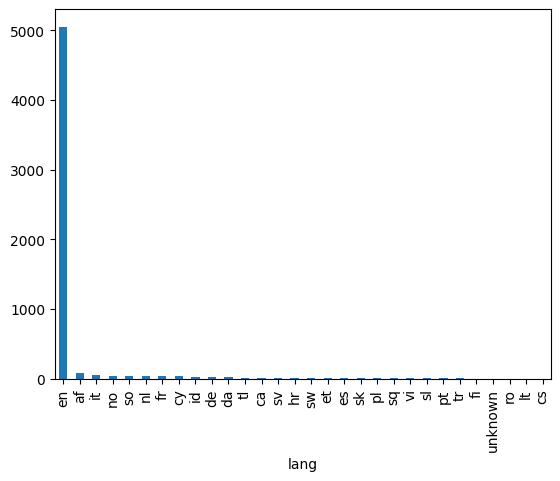

In [97]:
data['lang'].value_counts().plot(kind='bar')

In [98]:
pos = data[data["lang"]!="en"].index
only_en = data.drop(index=pos)
only_en["lang"].unique()

array(['en'], dtype=object)

In [99]:
spam_data = only_en[only_en['v1'] == "spam"]

In [100]:
all_spam = " ".join(spam_data["v2"])

In [101]:
# !pip install wordcloud

def generate_wordcloud(text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

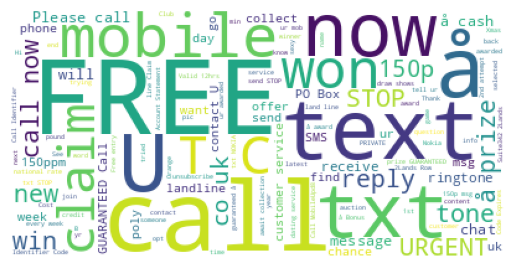

In [102]:
generate_wordcloud(all_spam)

<Axes: xlabel='v1'>

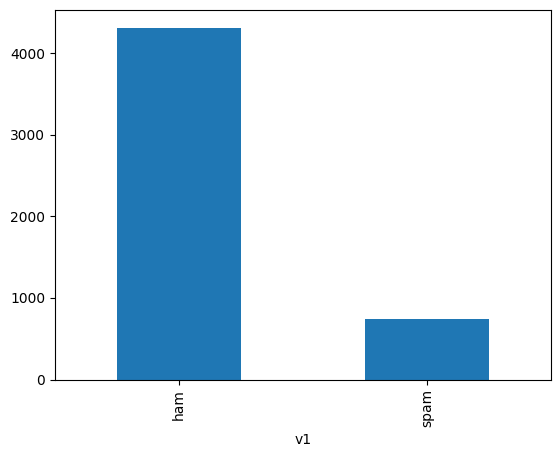

In [103]:
only_en["v1"].value_counts().plot(kind="bar")

In [104]:
only_en['v1'] = only_en['v1'].apply(lambda x: 1 if x == 'spam' else 0)
only_en.rename(columns={'v1':'label', 'v2':"text"}, inplace=True)

In [105]:
only_en

,label,text,lang
0,0,"Go until jurong point, crazy.. Available only ...",en
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,en
3,0,U dun say so early hor... U c already then say...,en
4,0,"Nah I don't think he goes to usf, he lives aro...",en
5,1,FreeMsg Hey there darling it's been 3 week's n...,en
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,en
5568,0,Will Ì_ b going to esplanade fr home?,en
5569,0,"Pity, * was in mood for that. So...any other s...",en
5570,0,The guy did some bitching but I acted like i'd...,en


In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(only_en["text"],only_en["label"],test_size=0.2,random_state=42)

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
# lst = x_train.tolist()
vectorizer = TfidfVectorizer(
lowercase=True,      # convert to lowercase before tokenizing
stop_words='english' # remove stop words
)
features_train_transformed = vectorizer.fit_transform(x_train) #gives tf idf vector for x_train
features_test_transformed  = vectorizer.transform(x_test) #gives tf idf vector for x_test

In [108]:
features_test_transformed

<1010x7141 sparse matrix of type '<class 'numpy.float64'>'
	with 7226 stored elements in Compressed Sparse Row format>

In [109]:
from sklearn.naive_bayes import MultinomialNB
# train the model
classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)

MultinomialNB()

In [110]:
print("classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

classifier accuracy 96.44%


In [113]:
labels = classifier.predict(features_test_transformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = y_test
predicted = labels
results = confusion_matrix(actual, predicted)
print('Confusion Matrix :')
print(results)
print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted)
print('F-Measure', score_2)

Confusion Matrix :
[[875   0]
 [ 36  99]]
Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       875
           1       1.00      0.73      0.85       135

    accuracy                           0.96      1010
   macro avg       0.98      0.87      0.91      1010
weighted avg       0.97      0.96      0.96      1010

F-Measure 0.846153846153846


In [1]:
import seaborn as sns
sns.heatmap(results, annot=True, cmap='coolwarm', linewidths=0.2)

NameError: name 'results' is not defined

In [ ]:
import pickle
pickle.dump(classifier, open('model.pkl','wb')